Active Contours using Level Sets
================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This tour explores image segementation using level set methods.

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")

  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

Managing level set functions
----------------------------
In the level set formalism, the evolution of some curve $ (\ga(t))_{t=0}^1 $
is computed by evolving the
zero level of a function $\phi : \RR^2 \rightarrow \RR $
$$ \enscond{\ga(s)}{ s \in [0,1] } = \enscond{x \in \RR^2}{\phi(x)=0}. $$
This corresponds to replacing the parameteric representation $\ga$ of
the curve by an implicit representation. This requires an additional
dimension (and hence more storage) but ease the handling of topological
change of the curve during the evolution.


Discretazion size $n \times n$ of the domain $[0,1]^2$.

In [2]:
include("ndgrid.jl")
n = 200
(Y, X) = meshgrid(collect(1:n), collect(1:n));

  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31
  likely near C:\Users\Ayman\.julia\v0.5\IJulia\src\kernel.jl:31


One can create a circular shape by using the signed distance function to
a circle
$$ \phi_1(x) = \sqrt{ (x_1-c_1)^2 + (x_2-c_2)^2 } - r $$
where $r>0$ is the radius and $c \in \RR^2$ the center.


Radius $r$.

In [3]:
r = n/3.;

Center $c$.

In [4]:
c = [r, r] .+ 10;

Distance function $\phi_1$.

In [5]:
phi1 = sqrt((X .- c[1]).^2 + (Y .- c[2]).^2) - r;

__Exercise 1__

Load a square shape $\phi_2$ at a different position for the center.

In [6]:
#run -i nt_solutions/segmentation_3_snakes_levelset/exo1
include("segmentation_3_snakes_levelset exo1.jl");

In [7]:
## Insert your code here.

Display the curves associated to $\phi_1$ and $\phi_2$.

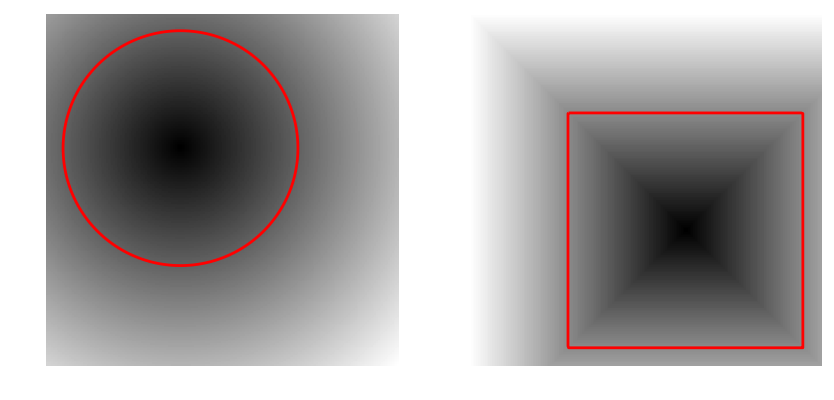

In [7]:
figure(figsize = (10,5))

subplot(1,2,1)
NtToolBox.plot_levelset(phi1)

subplot(1,2,2)
NtToolBox.plot_levelset(phi2)

__Exercise 2__

Compute the intersection and the union of the two shapes.
Store the union in $\phi_0$ (phi0)
that we will use in the remaining part of the tour.

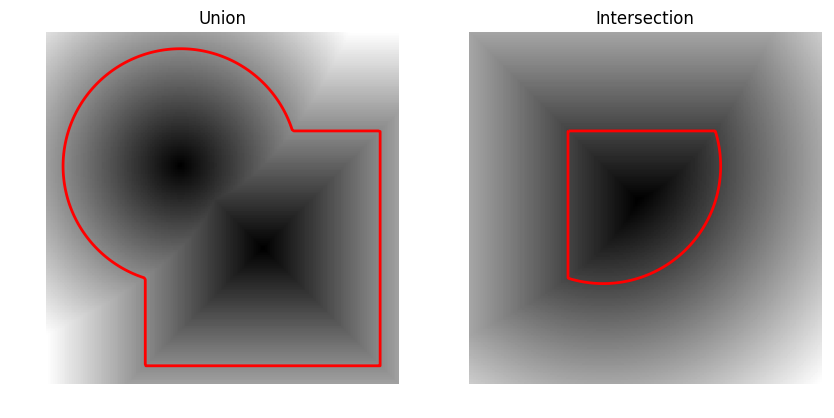

In [8]:
#run -i nt_solutions/segmentation_3_snakes_levelset/exo2
include("segmentation_3_snakes_levelset exo2.jl")

In [10]:
## Insert your code here.

Mean Curvature Motion.
----------------------
The mean curvature motion corresponds to the minimizing flow of the
length of the curve
$$ \int_0^1 \norm{\ga'(s)} d s. $$



It is implemeted in a level set formalism by a familly $\phi_t$ of
level set function parameterized by an artificial time $t \geq 0$, that
satisfies the following PDE
$$ \pd{\phi_t}{t} = -G(\phi_t)
  \qwhereq G(\phi) = -\norm{\nabla \phi} \text{div}
      \pa{  \frac{\nabla \phi}{\norm{\nabla \phi}} }  $$
and where $\nabla \phi_t(x) \in \RR^2$ is the spacial gradient.


This flow is computed using a gradient descent
$\phi^{(0)} = \phi_0$ and
$$ \phi^{(\ell+1)} = \phi^{(\ell)} - \tau G(\phi^{(\ell)}), $$
where $\tau>0$ is small enough time step.


Maximum time of the evolution $0 \leq t \leq t_{\max}$.

In [9]:
Tmax = 200;

Time step $\tau>0$ (should be small).

In [10]:
tau = .5;

Number of iterations.

In [11]:
niter = Int(Tmax/tau);

Initial shape $\phi^{(0)}$ at $t=0$.

In [12]:
phi = copy(phi0);

We now compute the right hand side of the evolution equation.


Compute the gradient $\nabla \phi$. We use centered differences for the discretization of the gradient.

In [13]:
# function gGrad(M, bound = "sym", order = 1)
#     """
#         grad - gradient, forward differences

#           [gx,gy] = grad(M, options);
#         or
#           g = grad(M, options);

#           options.bound = 'per' or 'sym'
#           options.order = 1 (backward differences)
#                         = 2 (centered differences)

#           Works also for 3D array.
#           Assme that the function is evenly sampled with sampling step 1.

#           See also: div.

#           Copyright (c) Gabriel Peyre
#     """


#     # retrieve number of dimensions
#     nbdims = ndims(M)


#     if bound == "sym"
#         nx = size(M)[1]
#         if order == 1
#             fx = M[vcat(collect(2 : nx), nx), :] - M
#         else
#             fx = (M[vcat(collect(2 : nx), nx), :] - M[vcat(1, collect(1 : nx - 1)), :])./2.
#             # boundary
#             fx[1, :] = M[2, :] - M[1, :]
#             fx[nx, :] = M[nx, :] - M[nx - 1, :]
#         end

#         if nbdims >= 2
#             ny = size(M)[2]
#             if order == 1
#                 fy = M[:, vcat(collect(2 : ny), ny)] - M
#             else
#                 fy = (M[:, vcat(collect(2 : ny), ny)] - M[:, vcat(1, collect(1 : ny - 1))])./2.
#                 # boundary
#                 fy[:, 1] = M[:, 2] - M[:, 1]
#                 fy[:, ny] = M[:, ny] - M[:, ny - 1]
#             end
#         end

#         if nbdims >= 3
#             nz = size(M)[3]
#             if order == 1
#                 fz = M[:, :, vcat(collect(2 : nz), nz)] - M
#             else
#                 fz = (M[:, :, vcat(collect(2 : nz), nz)] - M[:, :, vcat(1, collect(1 : nz - 1))])./2.
#                 # boundary
#                 fz[:, :, 1] = M[:, :, 2] - M[:, :, 1]
#                 fz[:, :, ny] = M[:, :, nz] - M[:, :, nz - 1]
#             end
#         end
#     else
#         nx = size(M)[1]
#         if order == 1
#             fx = M[vcat(collect(2 : nx), 1), :] - M
#         else
#             fx = (M[vcat(collect(2 : nx), 1), :] - M[vcat(nx, collect(1 : nx - 1)), :])./2.
#         end

#         if nbdims >= 2
#             ny = size(M)[2]
#             if order == 1
#                 fy = M[:, vcat(collect(2 : ny), 1)] - M
#             else
#                 fy = (M[:, vcat(collect(2 : ny), 1)] - M[:, vcat(ny, collect(1 : ny - 1))])./2.
#             end
#         end

#         if nbdims >= 3
#             nz = size(M)[3]
#             if order == 1
#                 fz = M[:, :, vcat(collect(2 : nz), 1)] - M
#             else
#                 fz = (M[:, :, vcat(collect(2 : nz), 1)] - M[:, :, vcat(nz, collect(1 : nz - 1))])./2.
#             end
#         end
#     end

#     if nbdims==2
#         fx = cat(3, fx[:, :], fy[:, :])
#     elseif nbdims==3
#         fx = cat(4, (fx[:, :, :], fy[:, :, :], fz[:, :, :]))
#     end
    
#     fx[end, :, 1] = fx[end - 1, :, 1]
#     fx[:, end, 2] = fx[:, end - 1, 2]
    

#     return fx
# end


g0 = NtToolBox.Grad(phi, "sym", 2);


Norm $\norm{\nabla \phi}$ of the gradient.

In [14]:
d = max(eps().*ones(n, n), sqrt(sum(g0.^2, 3)));

Normalized gradient.

In [15]:
g = g0./cat(3, d[:, :], d[:, :]);

The curvature term.

In [16]:
# function dDiv(Px, Py, bound = "sym", order = 1)
#     """
#         div - divergence operator

#         fd = div(Px,Py, options);
#         fd = div(P, options);

#           options.bound = 'per' or 'sym'
#           options.order = 1 (backward differences)
#                         = 2 (centered differences)

#           Note that the -div and grad operator are adjoint
#           of each other such that
#               <grad(f),g>=<f,-div(g)>

#           See also: grad.

#         Copyright (c) 2007 Gabriel Peyre
#     """

#     # retrieve number of dimensions
#     nbdims = ndims(Px)

#     if nbdims >= 3
#         if nbdims == 3
#             Py = P[:, :, 2]
#             Px = P[:, :, 1]
#             nbdims = 2
#         else
#             Pz = P[:, :, :, 3]
#             Py = P[:, :, :, 2]
#             Px = P[:, :, :, 1]
#             nbdims = 3
#         end
#     end

#     if bound == "sym"
#         nx = size(Px)[1]
#         if order == 1
#             fx = Px .- Px[vcat(1, collect(1, nx - 1)), :]
#             fx[1, :] = Px[1, :]                        # boundary
#             fx[nx, :] = - Px[nx - 1, :]

#             if nbdims >= 2
#                 ny = size(Py)[2]
#                 fy = Py - Py[:, vcat(1, collect(1, ny - 1))]
#                 fy[:, 1] = Py[:, 1]                    # boundary
#                 fy[:, ny] = - Py[:, ny - 1]
#             end

#             if nbdims >= 3
#                 nz = size(Pz)[3]
#                 fz = Pz - Pz[:, :, vcat(1, collect(1 : nz - 1))]
#                 fz[:, :, 1] = Pz[:, :, 1]                # boundary
#                 fz[:, :, nz] = - Pz[:, :, nz - 1]
#             end
#         else
#             fx = (Px[vcat(collect(2 : nx), nx), :] - Px[vcat([1], collect(1 : nx-1)), :])./2.
#             fx[1, :] = + Px[2, :]./2. + Px[1, :]           # boundary
#             fx[2, :] = + Px[3, :]./2. - Px[1, :]
#             fx[nx, :] = - Px[nx, :] - Px[nx - 1, :]./2.
#             fx[nx - 1, :] = + Px[nx, :] - Px[nx - 2, :]./2.

#             if nbdims >= 2
#                 ny = size(Py)[2]
#                 fy = (Py[:, vcat(collect(2 : ny), ny)] - Py[:, vcat(1, collect(1 : ny-1))])./2.
#                 fy[:, 1] = + Py[:, 2]./2. + Py[:, 1]       # boundary
#                 fy[:, 2] = + Py[:, 3]./2. - Py[:,1]
#                 fy[:, ny] = - Py[:, ny] - Py[:, ny-1]./2.
#                 fy[:, ny - 1] = + Py[:, ny] - Py[:, ny - 2]./2.
#             end

#             if nbdims >= 3
#                 nz = size(Pz)[3]
#                 fz = (Pz[:, :, vcat(collect(2 : nz), nz)] - Pz[:, :, vcat(1, collect(1 : nz - 1))])./2.
#                 fz[:, :, 1] = + Pz[:, :, 2]./2. + Pz[:, :, 1] # boundary
#                 fz[:, :, 2] = + Pz[:, :, 3]./2. - Pz[:, :, 1]
#                 fz[:, :, ny] = - Pz[:, :, nz] - Pz[:, :, nz - 1]./2.
#                 fz[:, :, ny - 1] = + Pz[:, :, nz] - Pz[:, :, nz - 2]./2.
#             end
#         end

#     else
#         if order == 1
#             nx = size(Px)[1]
#             fx = Px - Px[vcat(nx, collect(1 : nx-1)), :]

#             if nbdims >= 2
#                 ny = size(Py)[2]
#                 fy = Py - Py[:, vcat(ny, collect(1 : ny-1))]
#             end

#             if nbdims>=3
#                 nz = size(Pz)[3]
#                 fz = Pz - Pz[:, :, vcat(nz, collect(1 : nz-1))]
#             end

#         else
#             nx = size(Px)[1]
#             fx = (Px[vcat(collect(2 : nx), 1), :]) - (Px[vcat(nx, collect(1, nx - 1)), :])

#             if nbdims >= 2
#                 ny = size(Py)[2]
#                 fy = (Py[:, vcat(collect(2 : ny), 1)]) - (Py[:, vcat(ny, collect(1, ny - 1))])
#             end

#             if nbdims >= 3
#                 nz = size(Pz)[3]
#                 fz = (Pz[:, :, vcat(collect(2, nz), 1)]) - (Pz[:, :, vcat(nz, collect(1 : nz - 1))])
#             end
#         end
#     end

#     # gather result
#     if nbdims == 3
#         fd = fx + fy + fz

#     elseif nbdims == 2
#         fd = fx + fy

#     else
#         fd = fx
#     end

#     return fd
# end


K = - d.*NtToolBox.Div(g[:, :, 1], g[:, :, 2], "sym", 2);




Perform one step of the gradient descent.

In [17]:
phi = phi - tau.*K;

__Exercise 3__

Implement the mean curvature motion.

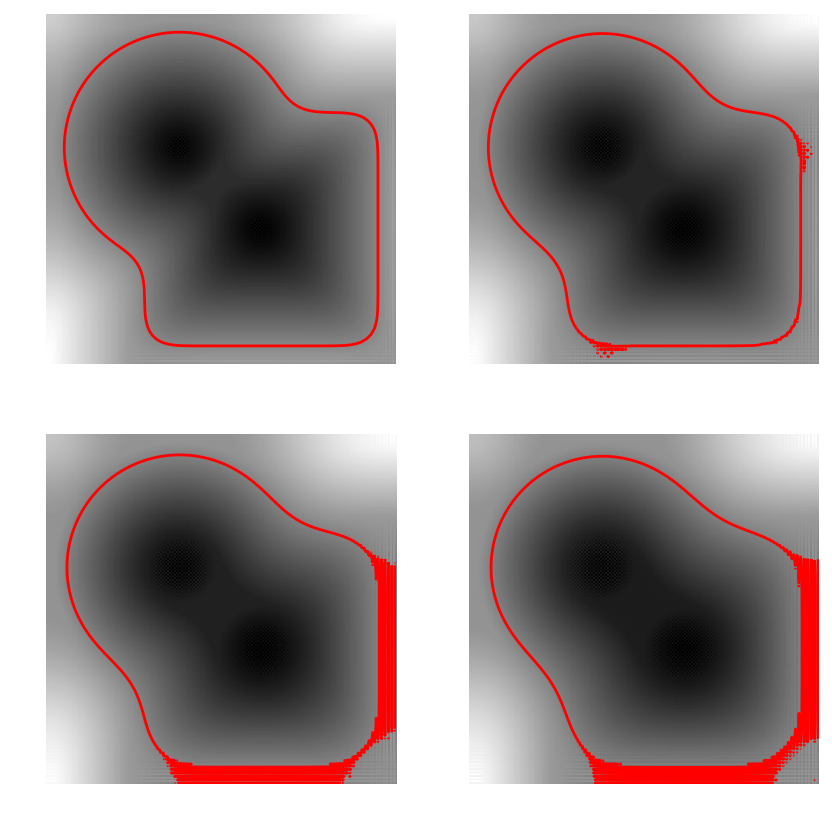

In [18]:
include("Exos\\segmentation_3_snakes_levelset\\exo3.jl")

In [21]:
## Insert your code here.

Levelset Re-distancing
----------------------
During PDE resolution, a level set function $\phi$ might become
ill-conditionned, so that the zero crossing is not sharp enough.
The quality of the level set function is restored by computing the
signed distance function to the zero level set.



This corresponds to first extracting the zero level set
$$ \Cc = \enscond{x \in \RR^2 }{\phi(x)=0},  $$
and then solving the following eikonal equation PDE on $\tilde \phi$
(in viscosity sense)
$$ \norm{\nabla \tilde \phi(x)} = 1
      \qandq \forall y \in \Cc, \tilde\phi(y)=0. $$
The one can replace $\phi$ by $\text{sign}(\phi(x))\tilde \phi(x)$
which is the signed distance function to $\Cc$.


We set $\phi=\phi_0^3$ so that they are both valid level set function
of the same curve, but $\phi$ is not the signed distance function.

In [42]:
phi = phi0.^3;

Solve the eikonal PDE using the Fast Marching algorithm. You have to install a C++ compiler (https://wiki.python.org/moin/WindowsCompilers#Microsoft_Visual_C.2B-.2B-_14.0_standalone:_Visual_C.2B-.2B-_Build_Tools_2015_.28x86.2C_x64.2C_ARM.29) and the package scikit-fmm (skfmm) to run this function (pip install scikit_fmm in the console).

In [165]:
# # from nt_toolbox.perform_redistancing import *
# # phi1 = perform_redistancing(phi0)

# # NtToolBox.perform_redistancing(phi0)


# n = size(D,1)

# # % horizontal
# P1 = D[1 : end - 1, :]
# P2 = D[2 : end, :]
# P = (P1.*P2) .<= 0
# d = abs(P1-P2)

# l = collect((i, j) for i in 1:size(d)[1] for j in 1:size(d)[2] if d[i, j] < eps())
# for i in 1:size(d)[1]
#     for j in 1:size(d)[2]
#         if (i, j) in l
#             d[i, j] =1
#         end
#     end
# end

# v1 = abs(P1)./d
# v2 = abs(P2)./d
# Ah = ([P; zeros(1,n)] + [zeros(1,n); P]) .> 0
# Vh = max([v1; zeros(1, n)], [zeros(1, n); v2])
# # % vertical
# P1 = D[:, 1 : end - 1]
# P2 = D[:, 2 : end]
# P = (P1.*P2) .<= 0;
# d = abs(P1-P2)
# l = collect((i, j) for i in 1:size(d)[1] for j in 1:size(d)[2] if d[i, j] < eps())
# for i in 1:size(d)[1]
#     for j in 1:size(d)[2]
#         if (i, j) in l
#             d[i, j] =1
#         end
#     end
# end
# v1 = abs(P1)./d
# v2 = abs(P2)./d
# Av = ([P zeros(n, 1)] + [zeros(n, 1) P]) .> 0
# Vv = max([v1 zeros(n, 1)], [zeros(n,1) v2])

# V = zeros(n, n)
# I = find(Ah .> 0)
# V[I] = Vh[I]
# I = find(Av .> 0)
# V[I] = max(V[I], Vv[I])

# I = find(V .!= 0)
# x, y = ind2sub(size(D), I) 
# start_points = [x[:]'; y[:]']
                        
# DD = ones(n, n)
# D_temp = copy(DD)
# D_temp[start_points[1, :], start_points[2, :]] = 0
# D_temp







LoadError: MethodError: no method matching getEikonalParam(::Array{Float64,2})[0m
Closest candidates are:
  getEikonalParam([1m[31m::jInv.Mesh.RegularMesh[0m, [1m[31m::Array{Float64,N}[0m, [1m[31m::Array{Int64,1}[0m, [1m[31m::Bool[0m) at C:\Users\Ayman\.julia\v0.5\FactoredEikonalFastMarching\src\FactoredEikonalFastMarching.jl:66[0m

Display the level sets.

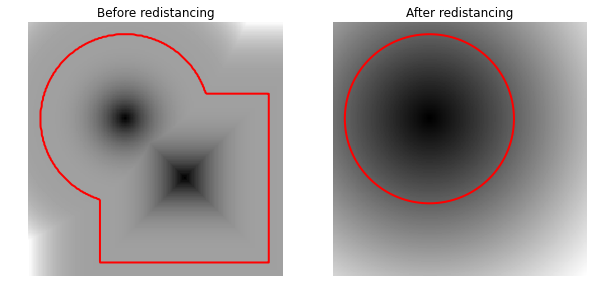

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plot_levelset(phi)
plt.title("Before redistancing")

plt.subplot(1,2,2)
plot_levelset(phi1)
plt.title("After redistancing")

plt.show()

Edge-based Segmentation with Geodesic Active Contour
----------------------------------------------------
Geodesic active contours compute loval minimum of a weighted geodesic
distance that attract the curve toward the features of the background
image.


_Note:_ these active contours should not be confounded with the geodesic shortest paths,
that are globally minimizing geodesics between two points.
Here the active contour is a close curve progressively decreasing a
weighted geodesic length that is only a local minimum
(the global minimum would be a single point).


Size of the image.

In [32]:
n = 200

200

First we load an image $f_0 \in \RR^{n \times n}$ to segment.

In [33]:
f0 = NtToolBox.rescale(NtToolBox.load_image("NtToolBox/src/data/cortex.png", n))

200×200 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

Given a background image $f_0$ to segment, one needs to compute
an edge-stopping function $W$.
It should be small in area of high gradient, and high in area of large gradient.


We use here
$$ W(x) = \al + \frac{\be}{\epsilon + d(x) }
      \qwhereq d = \norm{\nabla f_0} \star h_a, $$
and where $h_a$ is a blurring kernel of size $a>0$.


Compute the magnitude of the gradient $d_0(x) = \norm{\nabla f_0(x)}$.

In [34]:
g = NtToolBox.Grad(f0, "sym", 2)
d0 = sqrt(sum(g.^2, 3))

200×200×1 Array{Float32,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

Blur size $a$.

In [35]:
a = 5

5

Compute the blurring $d = d_0 \star h_a$.

In [37]:
d = NtToolBox.perform_blurring(d0[:, :, 1], [a], "per")
# x = d0[:, :, 1]
# ndims(d0[:, :, 1])

######

# M = copy(d0[:, :, 1])
# sigma = [a]



# n = maximum(size(M))

# eta = 4
# p = round((sigma.*eta)./2.).*2 + 1
# p = min(p, (round(n/2.)*2 - 1).*ones(length(p)))

# A = [1., 1.]
# if ndims(M) == 1
#     A = 1 #1D
# end

# h = NtToolBox.compute_gaussian_filter(p.*A, sigma./(4.*n), n*A)
# h = h[1 : end - 1, 1 : end - 1]

######

# x = copy(M)

# bound = "per"

# if !(bound in ["sym", "per"])
#     error("bound should be sym or per")
# end


# n = size(x)
# p = size(h)

# nd = ndims(x)




    ################################
    # periodic boundary conditions #


# n = [n[1], n[2]]
# p = [p[1], p[2]]
# d = Array{Int64, 1}(floor((p - 1)/2.))


# h = vcat(h[d[1] + 1 : end, :], vcat(zeros(n[1] - p[1], p[2]), h[1 : d[1], :]))
# h = hcat(h[:, d[2] + 1 : end], hcat(zeros(n[1], n[2] - p[2]), h[:, 1 : d[2] ]))
# y = real(plan_ifft((plan_fft(x)*x).*(plan_fft(h)*h))*((plan_fft(x)*x).*(plan_fft(h)*h)))

# d = copy(y)




200×200 Array{Float64,2}:
 5.9584e-9   6.6162e-9   5.53747e-9  …   1.78012e-9    3.81926e-9 
 5.77851e-9  6.8358e-9   6.14498e-9      1.49978e-9    3.42404e-9 
 5.22466e-9  6.6145e-9   6.30276e-9      1.18205e-9    2.80947e-9 
 4.67834e-9  6.09808e-9  5.86257e-9      8.79016e-10   2.2775e-9  
 4.3754e-9   5.63549e-9  5.31549e-9      8.3428e-10    2.08553e-9 
 4.00577e-9  5.21582e-9  4.98375e-9  …   9.80217e-10   1.95732e-9 
 3.34275e-9  4.73909e-9  4.74717e-9      9.21425e-10   1.48806e-9 
 2.54704e-9  4.15918e-9  4.32112e-9      7.10257e-10   8.20483e-10
 1.90484e-9  3.58806e-9  3.8112e-9       4.80324e-10   2.987e-10  
 1.56675e-9  3.21581e-9  3.53196e-9      7.11704e-11   2.72428e-12
 1.54822e-9  3.09474e-9  3.43611e-9  …  -3.58046e-10  -4.66424e-11
 1.66232e-9  3.07135e-9  3.31346e-9     -4.30555e-10   1.04568e-10
 1.80051e-9  3.14044e-9  3.18811e-9     -2.84643e-10   2.58503e-10
 ⋮                                   ⋱                            
 5.58488e-9  5.49843e-9  4.12695e-9 

, Array{Float64, 1}) in module NtToolBox at none:16 overwritten at none:16.


Parameter $\epsilon>0$.

In [38]:
epsilon = 1e-1

0.1

We set the $\al$ and $\be$ parameters to adjust the overall values of $W$
(equivalently we use the function rescale).

In [39]:
W = 1./(epsilon + d)
W = NtToolBox.rescale(-d, 0.1, 1)

200×200 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.

Display it.

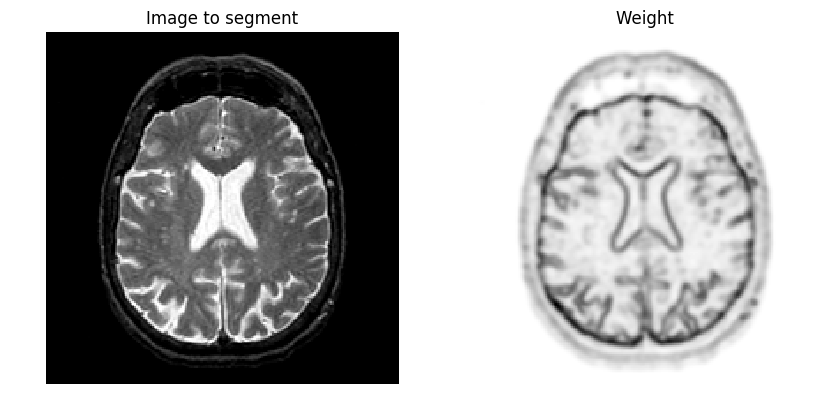

PyObject <matplotlib.text.Text object at 0x0000000024B8D5C0>

In [40]:
figure(figsize = (10, 5))
NtToolBox.imageplot(f0, "Image to segment", [1, 2, 1])
NtToolBox.imageplot(W, "Weight", [1, 2, 2])

__Exercise 4__

Compute an initial shape $\phi_0$ at time $t=0$,
for instance a centered square.

In [42]:
# run -i nt_solutions/segmentation_3_snakes_levelset/exo4
include("Exos\\segmentation_3_snakes_levelset\\exo4.jl")

200×200 Array{Float64,2}:
 32.3333  32.3333  32.3333  32.3333  …  32.3333  32.3333  32.3333  33.3333
 32.3333  31.3333  31.3333  31.3333     31.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  30.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333  …  30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333  …  30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333

In [34]:
## Insert your code here.

Display it.

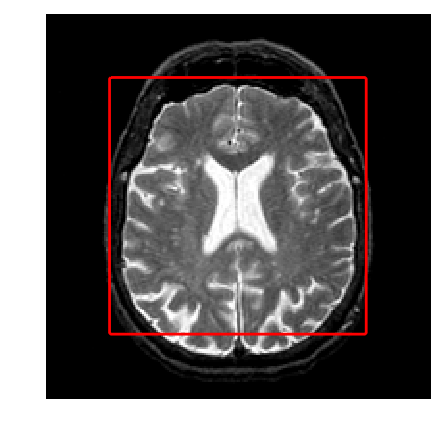

In [43]:
figure(figsize = (5, 5))
NtToolBox.plot_levelset(phi0, 0, f0)

The geodesic active contour minimizes a weighted length of curve
$$ \umin{\ga} \int_0^1 \norm{\ga'(s)} W(\ga(s)) d s $$


The level set implementation of the gradient descent of this energy reads
$$ \pd{\phi_t}{t} = G(\phi_t)
  \qwhereq G(\phi) = -\norm{\nabla \phi} \text{div}\pa{
          W \frac{\nabla \phi}{\norm{\nabla \phi}}
  } $$


This is implemented using a gradient descent scheme.
$$ \phi^{(\ell+1)} = \phi^{(\ell)} - \tau G(\phi^{(\ell)}), $$
where $\tau>0$ is small enough.


Gradient step size $\tau>0$.

In [44]:
tau = .4

0.4

Final time and number of iteration of the algorithm.

In [45]:
Tmax = 1500
niter = Int(Tmax/tau)

3750

Initial distance function $\phi^{(0)}=\phi_0$.

In [46]:
phi = copy(phi0)

200×200 Array{Float64,2}:
 32.3333  32.3333  32.3333  32.3333  …  32.3333  32.3333  32.3333  33.3333
 32.3333  31.3333  31.3333  31.3333     31.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  30.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333  …  30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333  …  30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333
 32.3333  31.3333  30.3333  29.3333     30.3333  31.3333  32.3333  33.3333

Note that we can re-write the gradient of the energy as
$$ G(\phi) = -W \norm{\nabla \phi} \text{div} \pa{ \frac{\nabla \phi}{\norm{\nabla \phi}}  } - \dotp{\nabla W}{\nabla \phi} $$


Pre-compute once for all $\nabla W$.

In [47]:
gW = NtToolBox.Grad(W, "sym", 2)

200×200×2 Array{Float64,3}:
[:, :, 1] =
  4.99213e-10  -6.09435e-10  -1.68593e-9   …   7.78004e-10   1.0968e-9  
  1.01812e-9    2.35606e-12  -1.0619e-9        8.29876e-10   1.40117e-9 
  1.52659e-9    1.02365e-9    3.91873e-10      8.61359e-10   1.59093e-9 
  1.17843e-9    1.35846e-9    1.36992e-9       4.82559e-10   1.00452e-9 
  9.33238e-10   1.22422e-9    1.21943e-9      -1.40426e-10   4.44278e-10
  1.43289e-9    1.24383e-9    7.88599e-10  …  -1.20921e-10   8.29051e-10
  2.02412e-9    1.46618e-9    9.1945e-10       3.74593e-10   1.57746e-9 
  1.99521e-9    1.59715e-9    1.29873e-9       6.12065e-10   1.65033e-9 
  1.36023e-9    1.309e-9      1.09503e-9       8.86787e-10   1.13471e-9 
  4.94851e-10   6.84517e-10   5.20466e-10      1.16331e-9    4.79192e-10
 -1.32608e-10   2.00453e-10   3.03198e-10  …   6.96186e-10  -1.41317e-10
 -3.50081e-10  -6.34091e-11   3.44128e-10     -1.01852e-10  -4.23415e-10
 -7.76543e-10  -7.94821e-10  -1.05733e-10     -1.52723e-10  -3.8125e-10 
  ⋮        

__Exercise 5__

Compute and store in G the gradient $G(\phi)$ (right hand side of the PDE)
using the current value of the distance function $\phi$.

In [53]:
# run -i nt_solutions/segmentation_3_snakes_levelset/exo5

include("Exos\\segmentation_3_snakes_levelset\\exo5.jl")

# gD = NtToolBox.Grad(phi, "sym", 2)
# d = max(eps().*ones(n, n), sqrt(sum(gD.^2, 3)))
# g = gD ./ repeat(d[:, :, 1], inner = [1, 1, 2])
# G = - W.*d.*NtToolBox.Div(g[:, :, 1], g[:, :, 2], "sym", 2) - sum(gW.*gD, 3)




200×200×1 Array{Float64,3}:
[:, :, 1] =
 -0.0        1.35355    1.5          …   0.853553     -0.5       0.75    
  1.35355   -1.41421   -1.0             -1.06066      -0.646447  1.5     
  1.5       -1.0       -0.707107        -0.5          -0.5       1.5     
  1.5       -0.5       -0.5             -3.33485e-9   -0.5       1.5     
  1.5       -0.5        1.82574e-9      -3.67569e-9   -0.5       1.5     
  1.5       -0.5        1.35116e-9   …  -3.23096e-9   -0.5       1.5     
  1.5       -0.5        7.7742e-10      -2.86626e-9   -0.5       1.5     
  1.5       -0.5        4.83212e-10     -3.04732e-9   -0.5       1.5     
  1.5       -0.5        3.10261e-10     -3.39716e-9   -0.5       1.5     
  1.5       -0.5        1.68382e-12     -3.22754e-9   -0.5       1.5     
  1.5       -0.5       -1.54045e-10  …  -2.14469e-9   -0.5       1.5     
  1.5       -0.5       -1.25695e-11     -5.29478e-10  -0.5       1.5     
  1.5       -0.5        5.19111e-10      5.10437e-10  -0.5       1.5    

In [55]:
## Insert your code here.

Do the descent step.

In [56]:
phi = phi - tau*G

200×200×1 Array{Float64,3}:
[:, :, 1] =
 32.3333  31.7919  31.7333  31.7333  …  31.7333  31.9919  32.5333  33.0333
 31.7919  31.899   31.7333  31.5333     31.7333  31.7576  32.5919  32.7333
 31.7333  31.7333  30.6162  30.5333     30.6162  31.5333  32.5333  32.7333
 31.7333  31.5333  30.5333  29.6162     30.5333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.5333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333  …  30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333  …  30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32.5333  32.7333
 31.7333  31.5333  30.3333  29.3333     30.3333  31.3333  32

Once in a while (e.g. every 30 iterations), perform re-distancing of $\phi$.

In [43]:
phi = perform_redistancing(phi)

__Exercise 6__

Implement the geodesic active contours gradient descent.
Do not forget to do the re-distancing.

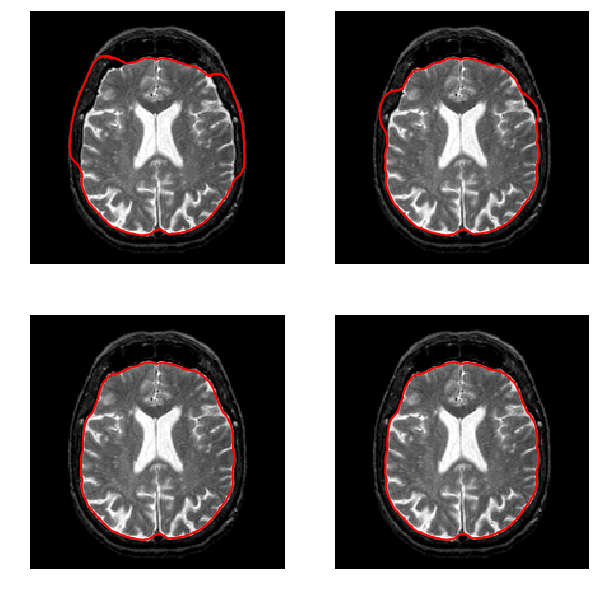

In [44]:
# run -i nt_solutions/segmentation_3_snakes_levelset/exo6

# I will translate this exercise as soon as I finish the work concerning perform_redistancing

# figure(figsize = (10, 10))
# phi = copy(phi0)
# k = 0
# gW = NtToolBox.Grad(W, "sym", 2)

# for i in 1 : niter
#     gD = NtToolBox.Grad(phi, "sym", 2)
#     d = np.maximum(eps*np.ones([n,n]), np.sqrt(np.sum(gD**2, 2)))
#     g = gD/np.repeat(d[:,:,np.newaxis], 2, 2)
#     G = W*d*div(g[:,:,0], g[:,:,1], order=2) + np.sum(gW*gD,2)
#     phi = phi + tau*G
#     if i % 30 == 0:
#         phi = perform_redistancing(phi)
#     if i % int(niter/4.) == 0:
#         k = k + 1
#         plt.subplot(2, 2, k)
#         plot_levelset(phi,0,f0)


In [45]:
## Insert your code here.

Region-based Segmentation with Chan-Vese 
-----------------------------------------
Chan-Vese active contours corresponds to a region-based energy
that looks for a piecewise constant approximation of the image.


The energy to be minimized is
$$ \umin{\phi}
      L(\phi) +
      \la \int_{\phi(x)>0} \abs{f_0(x)-c_1}^2 d x   +
      \la \int_{\phi(x)<0} \abs{f_0(x)-c_2}^2 d x
$$
where $L$ is the length of the zero level set of $\phi$.
Note that here $(c_1,c_2) \in \RR^2$ are assumed to be known.

__Exercise 7__

Compute an initial level set function $\phi_0$, stored in phi0,
for instance many small circles.

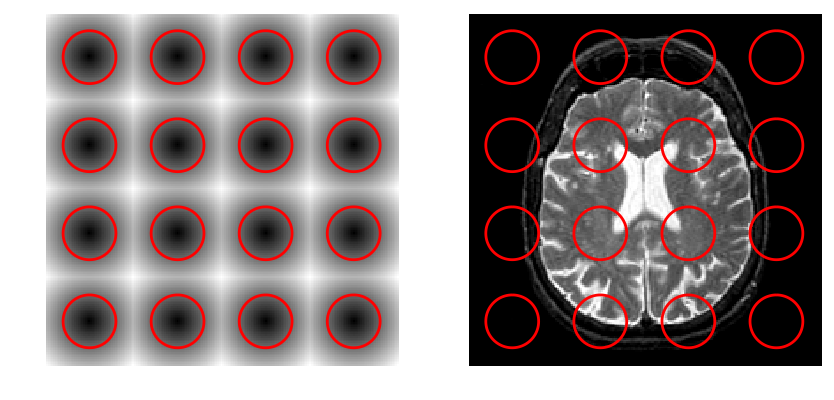

In [59]:
# run -i nt_solutions/segmentation_3_snakes_levelset/exo7
include("Exos\\segmentation_3_snakes_levelset\\exo7.jl")

In [47]:
## Insert your code here.

Parameter $\la$

In [60]:
lambd = 2

2

Values for $c_1,c_2$

In [61]:
c1 = .7
c2 = 0

0

Step size.

In [62]:
tau = .5

0.5

Number of iterations.

In [63]:
Tmax = 100
niter = Int(Tmax/ tau)

200

Initial distance function $\phi_0$ at time $t=0$.

In [64]:
phi = copy(phi0)

200×200 Array{Float64,2}:
 18.9411  18.2415  17.5576  16.8904   …  17.5576  18.2415  18.9411  19.6554
 18.2415  17.5269  16.8277  16.1448      16.8277  17.5269  18.2415  18.9706
 17.5576  16.8277  16.1127  15.4138      16.1127  16.8277  17.5576  18.3017
 16.8904  16.1448  15.4138  14.6985      15.4138  16.1448  16.8904  17.6497
 16.241   15.4795  14.7321  14.0         14.7321  15.4795  16.241   17.0156
 15.6105  14.8329  14.0689  13.3196   …  14.0689  14.8329  15.6105  16.4006
 15.0     14.2062  13.4253  12.6586      13.4253  14.2062  15.0     15.8058
 14.4109  13.6007  12.8029  12.0185      12.8029  13.6007  14.4109  15.2324
 13.8444  13.0179  12.2029  11.4008      12.2029  13.0179  13.8444  14.6816
 13.3019  12.4591  11.6271  10.807       11.6271  12.4591  13.3019  14.1548
 12.7849  11.9258  11.0768  10.2389   …  11.0768  11.9258  12.7849  13.6531
 12.2947  11.4197  10.5539   9.69818     10.5539  11.4197  12.2947  13.178 
 11.8328  10.9422  10.0599   9.18677     10.0599  10.9422  11.

The minimizing flow for the CV energy reads
$$ \pd{\phi_t}{t} = - G(\phi_t) $$
where
$$ G(\phi) =
- W \norm{\nabla \phi} \text{div}\pa{
	\frac{\nabla \phi}{\norm{\nabla \phi}}
} + \la (f_0-c_1)^2 - \la (f_0-c_2)^2. $$

__Exercise 8__

Compute this gradient $G(\phi)$ using the current value of the distance function
(phi$.
radient

In [65]:
# run -i nt_solutions/segmentation_3_snakes_levelset/exo8

gD = NtToolBox.Grad(phi, "sym", 2)
d = max(eps().*ones(n, n), sqrt(sum(gD.^2, 3)))
g = gD ./ repeat(d[:, :], inner = [1, 1, 2])
G = d.*NtToolBox.Div(g[:, :, 1], g[:, :, 2], "sym", 2) - lambd.*(f0 - c1).^2 + lambd.*(f0 - c2).^2


200×200×1 Array{Float64,3}:
[:, :, 1] =
 -3.06728  -1.68076   -2.05262   -2.07507   …  -2.03056   -1.65519   -3.05829
 -1.68076  -0.234354  -0.583285  -0.574628     -0.59179   -0.238736  -1.70073
 -2.05262  -0.583285  -0.947826  -0.947085     -0.94855   -0.579992  -2.06475
 -2.07507  -0.574628  -0.947085  -0.94629      -0.947859  -0.571358  -2.08679
 -2.09786  -0.565843  -0.946329  -0.945476     -0.947157  -0.56262   -2.10913
 -2.12091  -0.556953  -0.94556   -0.944646  …  -0.946445  -0.553805  -2.1317 
 -2.14418  -0.54799   -0.94478   -0.9438       -0.945725  -0.544947  -2.15445
 -2.16757  -0.538988  -0.943992  -0.942942     -0.945     -0.536083  -2.17729
 -2.19098  -0.529989  -0.943199  -0.942076     -0.944274  -0.527257  -2.20012
 -2.2143   -0.521039  -0.942405  -0.941205     -0.94355   -0.518517  -2.22284
 -2.2374   -0.512192  -0.941616  -0.940335  …  -0.942831  -0.509916  -2.24532
 -2.26014  -0.503505  -0.940835  -0.939471     -0.942124  -0.501512  -2.26743
 -2.28236  -0.495043  -0

In [54]:
## Insert your code here.

Do a descent step.

In [66]:
phi = phi + tau*G

200×200×1 Array{Float64,3}:
[:, :, 1] =
 17.4075  17.4012  16.5313   15.8529   …  16.5313   17.2263  18.1135  18.1263
 17.4012  17.4097  16.536    15.8575      16.536    17.231   18.1222  18.1202
 16.5313  16.536   15.6388   14.9403      15.6388   16.3534  17.2676  17.2693
 15.8529  15.8575  14.9403   14.2253      14.9403   15.6709  16.6048  16.6063
 15.1921  15.1966  14.259    13.5273      14.259    15.0059  15.9597  15.9611
 14.55    14.5544  13.5961   12.8473   …  13.5961   14.3596  15.3336  15.3348
 13.9279  13.9322  12.953    12.1867      12.953    13.7333  14.7275  14.7286
 13.3271  13.3312  12.3309   11.547       12.3309   13.1282  14.1428  14.1438
 12.7489  12.7529  11.7313   10.9297      11.7313   12.5457  13.5808  13.5816
 12.1948  12.1985  11.1559   10.3364      11.1559   11.9873  13.0427  13.0433
 11.6662  11.6697  10.606     9.76869  …  10.606    11.4544  12.5299  12.5304
 11.1646  11.1679  10.0834    9.22844     10.0834   10.9486  12.0439  12.0443
 10.6916  10.6947   9.58

__Exercise 9__

Implement the full gradient descent.

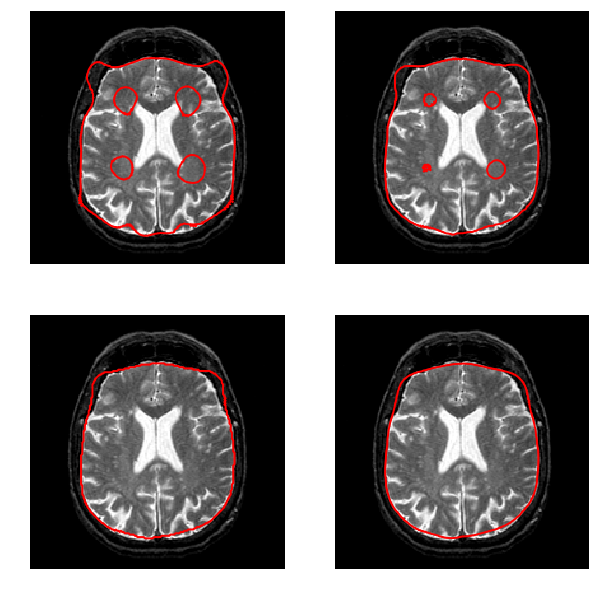

In [56]:
run -i nt_solutions/segmentation_3_snakes_levelset/exo9

In [57]:
## Insert your code here.